## Menampilkan Gambar

[link github](https://github.com/rexxar280903/Qml/blob/main/CNN/Tugas2_ComVis.ipynb)

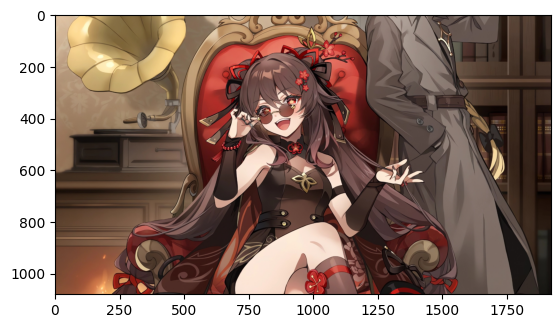

In [ ]:


import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('WW.png')


plt.imshow(img[:,:])
plt.show()

rgb_img = img

### Mengubah gambar menjad jpg (RGB)

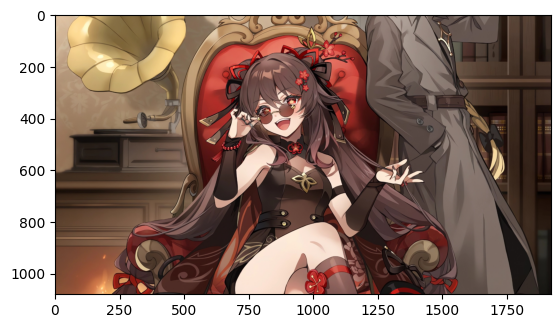

In [2]:
rgb_img = img[:,:,:3]
plt.imshow(rgb_img)

## Image Processing

### Mengubah gambar menjadi hitam putih

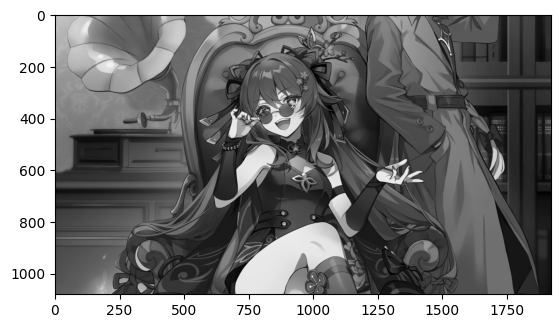

In [3]:
# mengubah menjadi grayscale 
# Misalkan rgb_img adalah gambar dengan 3 channel (R, G, B)

def convert_grayscale(img):
    # img = np.zeros((img.shape[0], img.shape[1]))  # Array kosong untuk grayscale
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Mengambil nilai R, G, B sebagai angka skalar
            r = img[i, j, 0]  
            g = img[i, j, 1]  
            b = img[i, j, 2]  

            # Menghitung grayscale
            img[i, j] = (r + g + b) / 3  
    return img

c = convert_grayscale(rgb_img)
plt.imshow(c)

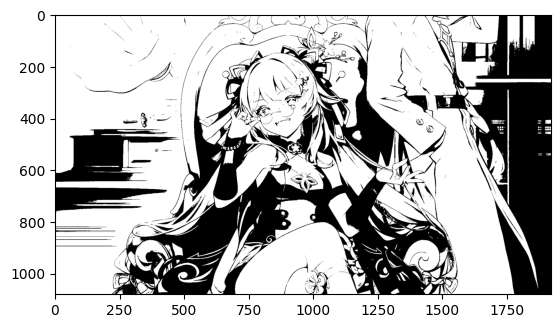

In [4]:
def black(img, threshold):
    """Mengubah gambar menjadi hitam putih berdasarkan threshold."""
    img = img.copy()  # Hindari perubahan langsung pada input
    if img.ndim == 3:  
        img = np.mean(img, axis=2)  # Konversi ke grayscale jika memiliki 3 channel (RGB)

    img = img * 255  # Pastikan skala dalam 0-255
    img = np.where(img > threshold, 255, 0)  # Gunakan NumPy untuk thresholding

    return img.astype(np.uint8)  # Pastikan dalam format uint8 agar kompatibel dengan matplotlib

# Panggil fungsi dan simpan hasilnya
c_bw = black(c, 60)

# Tampilkan gambar hasil
plt.imshow(c_bw, cmap='gray')
plt.show()


## menggunakan operator sobel

In [5]:
def convolve_2d(image, kernel):
    """Melakukan konvolusi 2D secara manual dengan padding"""
    kh, kw = kernel.shape
    ih, iw = image.shape
    pad_h, pad_w = kh // 2, kw // 2
    
    # Padding gambar
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    
    # Hasil konvolusi
    result = np.zeros_like(image, dtype=np.float64)
    
    # Perhitungan konvolusi manual
    for i in range(ih):
        for j in range(iw):
            result[i, j] = np.sum(kernel * padded_image[i:i+kh, j:j+kw])
    
    return result

def sobel_operator(image):
    if image.ndim == 3:
        # Konversi ke grayscale jika gambar berwarna
        image = np.mean(image, axis=2)
    
    # Definisi kernel Sobel
    sobel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    
    # Konvolusi dengan kernel Sobel
    grad_x = convolve_2d(image, sobel_x)
    grad_y = convolve_2d(image, sobel_y)
    
    # Menggabungkan gradien X dan Y
    sobel_combined = np.sqrt(grad_x**2 + grad_y**2)
    
    # Normalisasi hasil agar berada dalam rentang 0-255
    sobel_combined = (sobel_combined / np.max(sobel_combined)) * 255
    
    return sobel_combined

In [6]:
c_sobel = sobel_operator(c_bw)

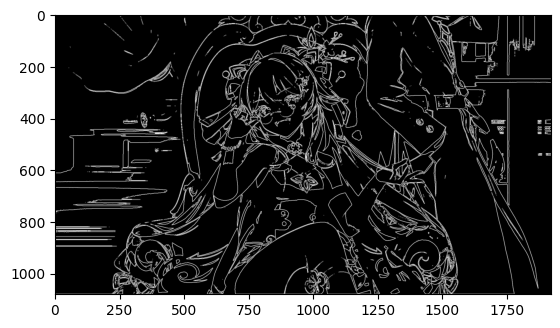

In [7]:
plt.imshow(c_sobel, cmap='gray')

In [8]:
def roberts_operator(image):
    if image.ndim == 3:
        # Konversi ke grayscale jika gambar berwarna
        image = np.mean(image, axis=2)
    
    # Definisi kernel Roberts
    roberts_x = np.array([[1, 0],
                           [0, -1]])
    
    roberts_y = np.array([[0, 1],
                           [-1, 0]])
    
    # Konvolusi dengan kernel Roberts
    grad_x = convolve_2d(image, roberts_x)
    grad_y = convolve_2d(image, roberts_y)
    
    # Menggabungkan gradien X dan Y
    roberts_combined = np.sqrt(grad_x**2 + grad_y**2)
    
    # Normalisasi hasil agar berada dalam rentang 0-255
    roberts_combined = (roberts_combined / np.max(roberts_combined)) * 255
    
    return roberts_combined

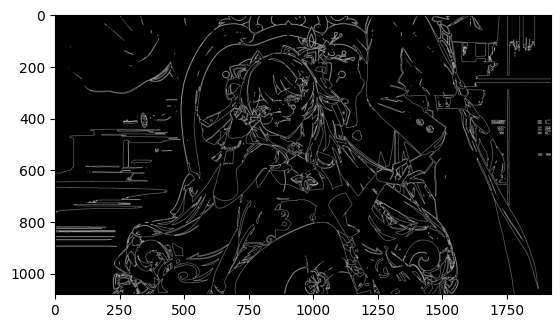

In [9]:
c_roberts = roberts_operator(c_bw)
plt.imshow(c_roberts, cmap="gray")

In [11]:
def prewitt_operator(image):
    if image.ndim == 3:
        image = np.mean(image, axis=2)
    
    prewitt_x = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])
    
    prewitt_y = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
    
    grad_x = convolve_2d(image, prewitt_x)
    grad_y = convolve_2d(image, prewitt_y)
    
    prewitt_combined = np.sqrt(grad_x**2 + grad_y**2)
    prewitt_combined = (prewitt_combined / np.max(prewitt_combined)) * 255
    
    return prewitt_combined


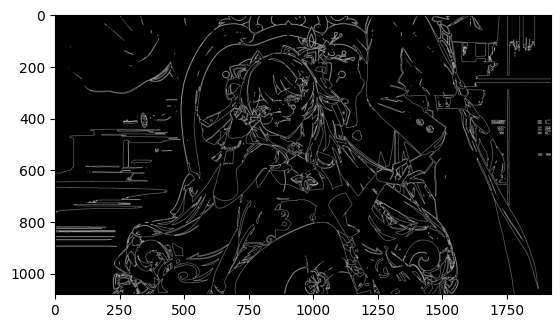

In [12]:
c_prewit = prewitt_operator(c_bw)
plt.imshow(c_roberts, cmap="gray")

In [13]:
def canny_operator(image, low_threshold=50, high_threshold=150):
    if image.ndim == 3:
        image = np.mean(image, axis=2)
    
    sobel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    
    grad_x = convolve_2d(image, sobel_x)
    grad_y = convolve_2d(image, sobel_y)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = (magnitude / np.max(magnitude)) * 255
    
    edges = np.zeros_like(magnitude)
    edges[(magnitude >= low_threshold) & (magnitude <= high_threshold)] = 255
    
    return edges


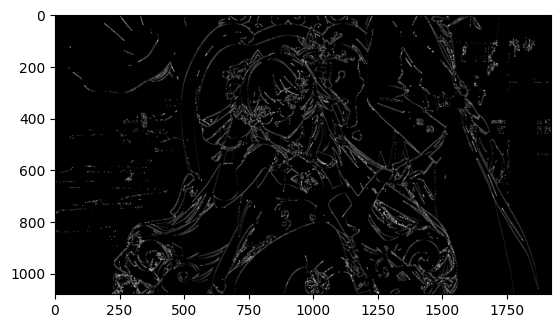

In [14]:
c_canny = canny_operator(c_bw)
plt.imshow(c_canny, cmap='gray')